In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv('ta_20200710174112.csv',skiprows=[0,1,2,3,4,5], encoding='cp949')
data

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-07-10,133,25.8,21.0,29.9
1,2010-07-11,133,22.0,20.5,26.2
2,2010-07-12,133,24.7,21.5,28.3
3,2010-07-13,133,24.7,22.4,28.3
4,2010-07-14,133,25.2,20.0,30.4
...,...,...,...,...,...
3648,2020-07-05,133,23.5,20.2,27.0
3649,2020-07-06,133,24.3,19.9,29.5
3650,2020-07-07,133,24.7,22.5,28.7
3651,2020-07-08,133,25.2,20.2,30.2


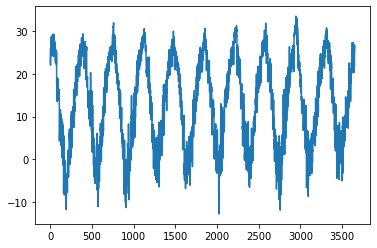

In [57]:
temp = data['평균기온(℃)']
temp.plot()
plt.show()

In [58]:
train_x = temp[:1461]
test_x = temp[1461:]

train_x = np.array(train_x)
test_x = np.array(test_x)
test_x.shape

(2192,)

In [59]:
attr_size = 180

tmp = []
train_X = []

for i in range(0, len(train_x) - attr_size):
  tmp.append(train_x[i:i+attr_size])

train_X = np.array(tmp)

train_X = pd.DataFrame(train_X)
train_X = np.transpose(train_X)

In [60]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(180, 90)
    self.fc2 = nn.Linear(90,64)
    self.fc3 = nn.Linear(64,90)
    self.fc4 = nn.Linear(90,180)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

model = Net()    

In [61]:
criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(5000):
  total_loss = 0
  d = []

  for i in range(100):
    index = np.random.randint(0,180)
    d.append(train_X[index])

  d = np.array(d, dtype='float32')
  d = Variable(torch.from_numpy(d)) 

  optimizer.zero_grad()

  output = model(d)

  loss = criterion(output, d)

  loss.backward()

  optimizer.step()


  if (epoch + 1) % 100 == 0:
    print(epoch + 1, loss) 


100 tensor(8.0211, grad_fn=<MseLossBackward>)
200 tensor(7.2129, grad_fn=<MseLossBackward>)
300 tensor(6.4163, grad_fn=<MseLossBackward>)
400 tensor(5.2521, grad_fn=<MseLossBackward>)
500 tensor(4.6386, grad_fn=<MseLossBackward>)
600 tensor(4.0940, grad_fn=<MseLossBackward>)
700 tensor(3.7044, grad_fn=<MseLossBackward>)
800 tensor(3.3742, grad_fn=<MseLossBackward>)
900 tensor(3.0302, grad_fn=<MseLossBackward>)
1000 tensor(2.6459, grad_fn=<MseLossBackward>)
1100 tensor(2.5018, grad_fn=<MseLossBackward>)
1200 tensor(2.2576, grad_fn=<MseLossBackward>)
1300 tensor(2.1331, grad_fn=<MseLossBackward>)
1400 tensor(2.0121, grad_fn=<MseLossBackward>)
1500 tensor(1.8575, grad_fn=<MseLossBackward>)
1600 tensor(1.7966, grad_fn=<MseLossBackward>)
1700 tensor(1.6754, grad_fn=<MseLossBackward>)
1800 tensor(1.6306, grad_fn=<MseLossBackward>)
1900 tensor(1.5613, grad_fn=<MseLossBackward>)
2000 tensor(1.4992, grad_fn=<MseLossBackward>)
2100 tensor(1.4571, grad_fn=<MseLossBackward>)
2200 tensor(1.3818, gr

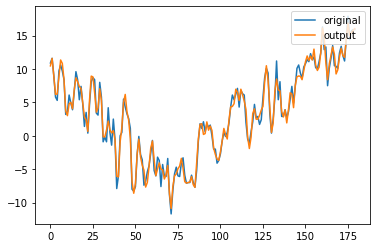

In [62]:
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc='upper right')
plt.show()

In [63]:
tmp = []
test_X = []
test_x = np.transpose(test_x)
tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
test_X = np.array(tmp,dtype=np.float32)
test_X = pd.DataFrame(test_X)

test_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,28.000000,26.700001,24.799999,24.4,25.9,25.299999,26.299999,24.600000,24.799999,26.9,27.9,27.799999,26.900000,26.299999,27.400000,29.9,24.799999,24.700001,25.200001,24.299999,28.6,27.299999,27.900000,27.4,26.200001,25.6,27.0,26.000000,21.5,23.5,25.799999,23.5,23.6,25.1,23.200001,20.9,24.200001,26.0,22.700001,21.6,...,9.400000,9.500000,10.3,9.4,1.6,-3.5,-0.900000,-2.2,-4.9,-3.2,-2.000000,-0.8,-2.3,0.7,1.2,-0.900000,-3.700000,-1.500000,2.400000,-1.8,-6.8,-4.9,-2.6,0.5,-3.7,-3.000000,-1.3,2.2,-1.1,-2.3,-1.400000,-0.8,3.3,4.2,-0.600000,-5.600000,-4.700000,-2.9,2.000000,3.200000
1,0.000000,-4.200000,-3.100000,-1.4,1.3,1.400000,-1.800000,0.200000,2.000000,2.4,1.0,-1.500000,-0.600000,1.800000,0.400000,2.5,3.100000,1.100000,2.800000,3.500000,5.3,-0.800000,-3.400000,-0.2,-0.900000,-3.5,-2.3,-0.500000,0.5,0.0,0.500000,1.4,1.7,-6.0,-4.500000,3.8,5.200000,-0.5,-0.800000,2.4,...,22.299999,23.299999,24.5,24.4,18.5,21.1,23.299999,22.5,22.1,22.9,18.799999,22.1,24.1,22.0,23.1,25.799999,23.200001,24.799999,26.200001,23.1,24.9,24.6,22.5,25.0,25.1,20.700001,23.5,24.4,25.0,24.0,21.799999,20.4,23.4,24.9,25.700001,22.299999,22.799999,23.6,23.700001,23.299999
2,24.200001,24.299999,20.400000,21.4,22.0,26.500000,27.100000,24.799999,23.900000,26.4,27.0,25.100000,23.200001,24.400000,25.799999,27.4,26.400000,27.200001,25.600000,25.500000,27.1,28.600000,25.700001,27.5,27.100000,29.4,29.6,29.299999,28.0,29.0,28.700001,29.0,29.9,30.6,27.700001,27.6,26.299999,25.9,25.299999,26.4,...,11.900000,10.800000,7.9,5.7,0.4,0.1,3.500000,6.8,6.9,4.4,6.200000,2.6,1.8,5.4,2.1,2.100000,3.400000,5.200000,8.100000,7.3,7.3,8.3,7.2,6.5,0.6,-2.700000,-0.7,1.8,1.1,4.3,3.500000,5.7,3.0,1.0,4.200000,-2.000000,-3.200000,-1.3,1.200000,1.500000


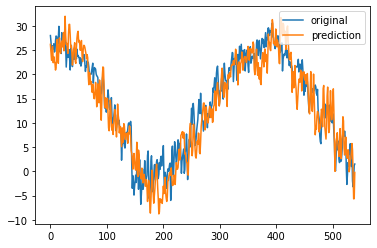

In [73]:
d = Variable(torch.from_numpy(np.asarray(test_X)))
output = model(d)
test_X = torch.from_numpy((np.asarray(test_X)))
plt.plot(test_X.flatten(), label = 'original')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upper right')
plt.show()

In [74]:
test = test_X.flatten()

pred = output.data.numpy().flatten()

total_score = []

for i in range(540):
  dist = (test[i] - pred[i])
  score = pow(dist, 2)
  total_score.append(score)

total_score = np.array(total_score, dtype=np.float32)
max_score = np.max(total_score)
total_score = total_score/ max_score

total_score

array([3.14714015e-02, 4.71863076e-02, 3.45212780e-02, 9.90526223e-06,
       9.36581055e-05, 8.01211074e-02, 6.74970150e-02, 3.64714004e-02,
       5.73693961e-02, 3.43354821e-01, 4.01970029e-01, 1.04468465e-01,
       8.24738469e-04, 5.86347878e-02, 2.49617040e-01, 1.52001292e-01,
       6.98010921e-02, 1.22567471e-02, 6.73779473e-03, 2.53828634e-02,
       2.83891968e-02, 2.61354912e-02, 4.72933520e-03, 1.43995164e-02,
       1.73718594e-02, 5.14905825e-02, 2.35464722e-01, 4.03373837e-02,
       2.05874681e-01, 8.00734833e-02, 4.88076452e-03, 6.40715798e-03,
       2.10782215e-01, 2.55899936e-01, 4.79976714e-01, 5.05709529e-01,
       1.82840209e-02, 2.50322395e-04, 2.63902396e-02, 9.32855182e-04,
       4.14467975e-03, 1.12874685e-02, 6.18134774e-02, 3.87765206e-02,
       3.37687805e-02, 5.16319796e-02, 4.47026566e-02, 4.82655615e-02,
       2.10614562e-01, 2.35370442e-01, 9.62072462e-02, 1.16430178e-01,
       1.45997152e-01, 2.32266653e-02, 2.08895639e-01, 2.07762659e-01,
      

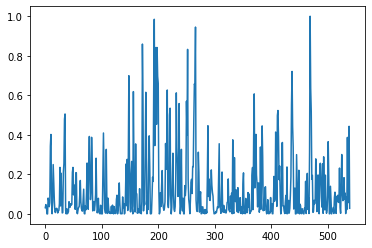

In [75]:
plt.plot(total_score)
plt.show()
/